In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('./project_data_user_count_30.csv',header=0)
data=data.dropna()

#data columns
data=data.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data=data.drop("genres", axis=1)
data.loc[data['average_user_rating']>=3.5, 'average_user_rating']=1
data.loc[data['average_user_rating']!=1, 'average_user_rating']=0

data_X=data.drop('average_user_rating',axis=1)
data_y=data.loc[:,data.columns=='average_user_rating']


data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']]=StandardScaler().fit_transform(data_X[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']])

os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(data_X, data_y, test_size=0.3, random_state=0)
columns=X_train.columns

X_train,y_train=os.fit_sample(X_train, y_train.to_numpy().ravel())
X_train = pd.DataFrame(data=X_train,columns=columns )
y_train= pd.DataFrame(data=y_train,columns=['average_user_rating'])

y_train.average_user_rating.value_counts()
X_train.head()

,user_rating_count,price,age_rating,language_en,language_sum,size,release_date,last_update,supported_devices,in_app_purchase
0,-0.157709,0.99,-0.851485,1,-0.561283,-0.479634,0.339021,-0.041101,0.099720,0
1,-0.151718,0.00,0.437470,1,-0.561283,0.228798,-0.249278,-0.327711,0.099720,0
2,-0.166011,0.00,-0.851485,1,-0.561283,-0.577119,0.122751,0.005774,0.099720,1
3,-0.156473,0.00,-0.851485,1,-0.561283,-0.572604,-0.410640,0.779888,0.859935,1
4,-0.166960,7.99,1.210842,1,-0.561283,5.092260,-0.688541,-0.083959,0.099720,0


In [3]:
from sklearn.metrics import classification_report

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
  
print(classification_report(y_test, y_pred))

confusion_matrix_Dt_binary = confusion_matrix(y_test,y_pred)
print(confusion_matrix_Dt_binary)

              precision    recall  f1-score   support

           0       0.18      0.32      0.23       109
           1       0.95      0.90      0.93      1679

    accuracy                           0.87      1788
   macro avg       0.57      0.61      0.58      1788
weighted avg       0.91      0.87      0.88      1788

[[  35   74]
 [ 163 1516]]


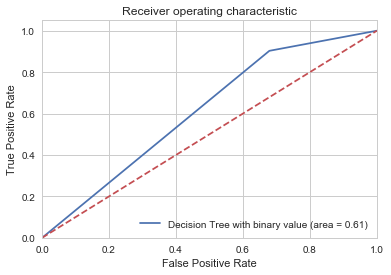

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree with binary value (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DecisionTree_ROC')
plt.show()

In [6]:
data1 = pd.read_csv('./project_data_user_count_30.csv',header=0)
data1= data1.dropna()

#data columns
data1=data1.iloc[:,1:12].join(data.iloc[:,-1]) #without genre
data1=data1.drop("genres", axis=1)


data_X_Dt_multi=data1.drop('average_user_rating',axis=1)
data_y_Dt_multi=data1.loc[:,data.columns=='average_user_rating']


data_X_Dt_multi[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']]=StandardScaler().fit_transform(data_X_Dt_multi[['user_rating_count','age_rating','language_sum','size','release_date','last_update','supported_devices']])

os=SMOTE(random_state=0)
X_train_Dt_Multi, X_test_Dt_Multi, y_train_Dt_Multi, y_test_Dt_Multi=train_test_split(data_X_Dt_multi, data_y_Dt_multi, test_size=0.3, random_state=0)
columns=data_X_Dt_multi.columns

X_train_Dt_Multi,y_train_Dt_Multi=os.fit_sample(X_train_Dt_Multi, y_train_Dt_Multi.to_numpy().ravel())
X_train_Dt_Multi = pd.DataFrame(data=X_train_Dt_Multi,columns=columns )
y_train_Dt_Multi= pd.DataFrame(data=y_train_Dt_Multi,columns=['average_user_rating'])

# y_train.average_user_rating.value_counts()
# X_train.head()

In [7]:
clf_Dt_multi = tree.DecisionTreeClassifier(criterion='entropy')
clf_Dt_multi = clf_Dt_multi.fit(X_train_Dt_Multi, y_train_Dt_Multi)
y_pred_Dt_Multi=clf_Dt_multi.predict(X_test_Dt_Multi)

y_test_res = y_test_Dt_Multi.values.ravel().tolist()
y_pred_res = y_pred_Dt_Multi.tolist()

# print(len(y_test_res))
# print(len(y_pred_res))
confusion_matrix_Dt_Multi = confusion_matrix(y_test_res,y_pred_res)
print(classification_report(y_test_res, y_pred_res))
print(confusion_matrix_Dt_Multi)

              precision    recall  f1-score   support

           2       0.05      0.18      0.08        11
           3       0.17      0.28      0.21        98
           4       0.46      0.46      0.46       621
           5       0.70      0.64      0.67      1058

    accuracy                           0.56      1788
   macro avg       0.35      0.39      0.36      1788
weighted avg       0.58      0.56      0.57      1788

[[  2   2   4   3]
 [  6  27  37  28]
 [ 14  62 286 259]
 [ 15  67 297 679]]
